In [2]:
# First, load any modules you need here.

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors as colors

import scipy.integrate as scipy_int

import scipy.interpolate as scipy_interpol

import scipy.misc as scipy_misc



# need to install sklearn ?

from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, ExpSineSquared, RationalQuadratic, Matern, WhiteKernel, DotProduct
from sklearn import preprocessing


<br>

# Chapter 5.11 - Linear Interpolation

<h3> Often, we have some data points or a function evaluated an some fixed points, but we want to know what the value at other points in between should be. This concept is closely related to curve fitting and integration.  <br>
    

Let's say you're given two data points, $x = [0 , 2]$ and $f(x) = [2, 4]$. But you want to calculate what's the expect value if x = 1 instead of 0 or 2. <br>

The best thing we can do is to fit a straight line through the two points and evaluate the slope using, 

$m = \frac{4-2}{2-0} = \frac{f(b) - f(a)}{b-a}$

$f(x) \approx y+z$

Where $y = m(x-a)$ and $z = f(a)$,

$f(x) \approx \frac{f(b) - f(a)}{b-a}(x-a)+f(a)$

$f(x) \approx \frac{(b-x)f(a) -(x-a)f(b)}{b-a}$

Using a Taylor expansion (don't worry about what that is, we're taking derivatives of $f(x)$), we can expands $f(x)$ out to first order to look at the expected error.  The error analysis on this method we get that,

$f(x) = \frac{(b-x)f(a) -(x-a)f(b)}{b-a} + (a-x)(b-x)f''(x)+....$

Setting the disance between point $b-a = h$, at worst $(a-x) \sim (b-x) \sim h/2$.  The error will then be:

$\epsilon \approx \frac{1}{4}h^2|f''(x)|$
    

Let's take a look at some linear interpoliation:
    

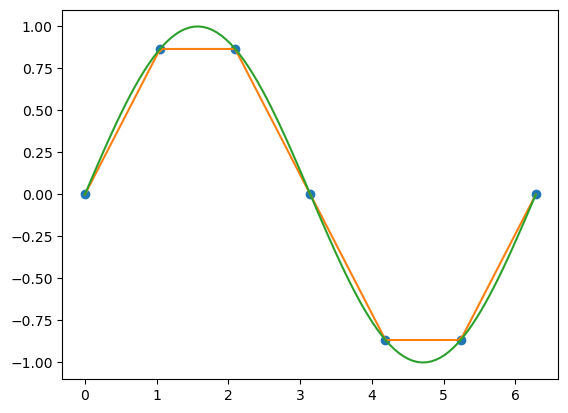

In [9]:
# linear interpolation:


def linear_interp(x,y,xnew):
    # Assume xnew is sorted.
    
    ynew=np.zeros(xnew.size)     # Create array to hold interpolated values
    n = x.size    # number of points in origional data
    
    # Loop over all the new x values
    
    for i in np.arange(xnew.size):
        
        ind = max(np.argwhere(x <= xnew[i]))   # first index to use
        ind = ind[0]

        if (ind == n-1):   # handle points at or past end of x values
            ind=ind-1

        m = (y[ind+1]-y[ind])/(x[ind+1]-x[ind])   # slope
        ynew[i] = m*(xnew[i]-x[ind]) + y[ind]     # interpolated value
        
    return ynew



# Now let's test it out:

def f(x):
    #return x**4-2*x**2+1
    return np.sin(x)



x = np.linspace(0,2*np.pi,7)

y = f(x)


xnew = np.linspace(0,2*np.pi,100)

ynew = linear_interp(x,y,xnew)



plt.plot(x, f(x),'o')
plt.plot(xnew, ynew)
plt.plot(xnew, f(xnew))
plt.show()




<h3>

This is really piecewise-linear interpoliation.  We assume a straight line between each set of points.

This curve is obviously not smooth.  At each data point, the derivative is not continuous.

## Cubic Spline Interpolation

<h3> 

We can do a better job by fitting a higher-order polynomial at each point.  But we don't want too much - we get very oscillatory functions.

Instead, we fit a lower-order polynomial to a few points.  But this leads to broken behavior when we go from one to another.  So what we do is fit polynomials such that the values and derivatives are the same at each data point - Splines
    
Usually, we use cubic spline interpolation (3rd order).
    
This is implemented for us in scipy.interpolate
   

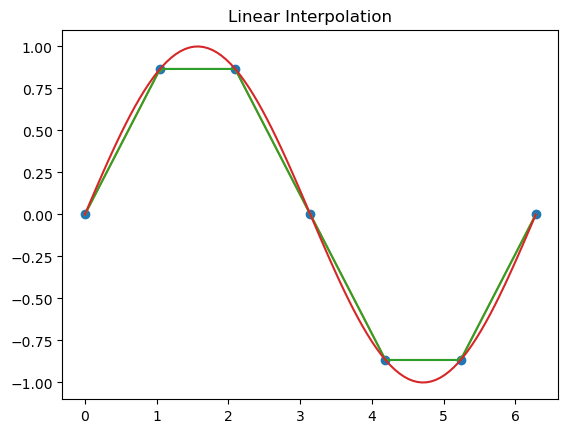

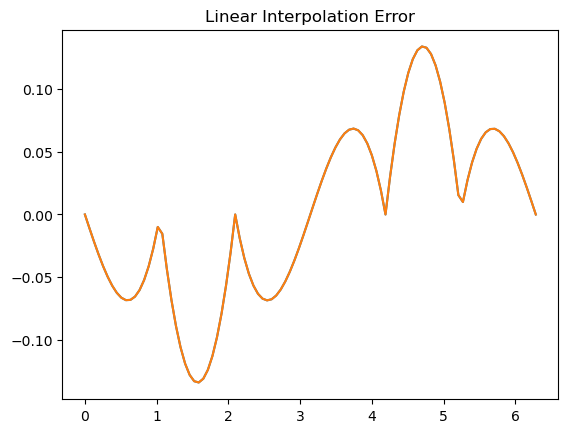

In [17]:
# linear interpolation:



# First, let's do linear interpolation:


# To use scipy.interpolate, we actually call interp1d, which create an interpolation function:

interp_f_linear = scipy_interpol.interp1d(x,y,kind='linear')


xnew = np.linspace(0,2*np.pi,100)

ynew = linear_interp(x,y,xnew)


# Use our function to make a linear interpolation:

ynew_linear = interp_f_linear(xnew)


# We could also do wit with the np.interp function:

ynew_linear = np.interp(xnew,x,y)


plt.plot(x, f(x),'o')
plt.plot(xnew, ynew)
plt.plot(xnew, ynew_linear)
plt.plot(xnew, f(xnew))
plt.title('Linear Interpolation')
plt.show()


# And let's plot the difference between real and interpolated values:

plt.plot(xnew,ynew_linear-f(xnew))
plt.plot(xnew,ynew-f(xnew))
plt.title('Linear Interpolation Error')
plt.show()




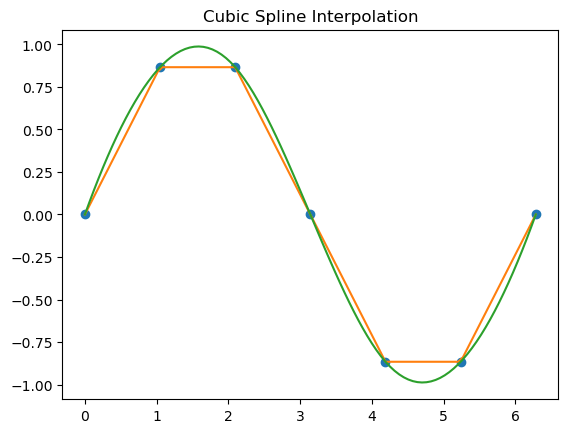

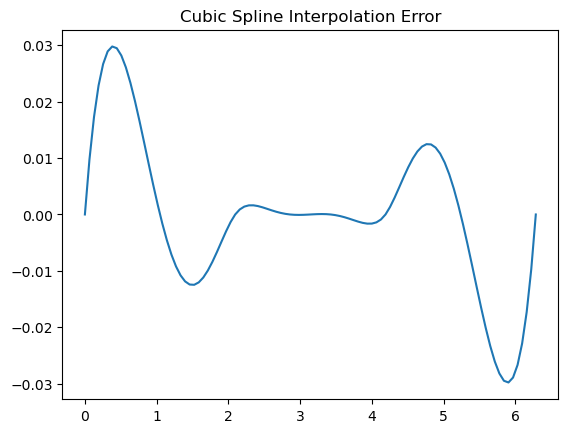

In [19]:
# cubic interpolation:



# Now let's test it out:


# To use scipy.interpolate, we actually call interp1d, which create an interpolation function:

interp_f_cubic = scipy_interpol.interp1d(x,y,kind='cubic')


xnew = np.linspace(0,2*np.pi,100)

ynew = linear_interp(x,y,xnew)


# Use our function to make a linear interpolation:

ynew_cubic = interp_f_cubic(xnew)


# We can also use the CubicSpline function:

interp_f_CubicSpline = scipy_interpol.CubicSpline(x,y)

ynew_cubic = interp_f_CubicSpline(xnew)

plt.plot(x, f(x),'o')
plt.plot(xnew, ynew)
plt.plot(xnew, ynew_cubic)
plt.title('Cubic Spline Interpolation')
#plt.plot(xnew, f(xnew))
plt.show()


# And let's plot the difference between real and interpolated values:

plt.plot(xnew,ynew_cubic-f(xnew))
plt.title('Cubic Spline Interpolation Error')
#plt.plot(xnew,ynew-f(xnew))
plt.show()



<h3>

We can see that the errors are much smaller for the Cubic Spline than for the linear interpolation.  The functon is also smooth, and so is the first derivative:


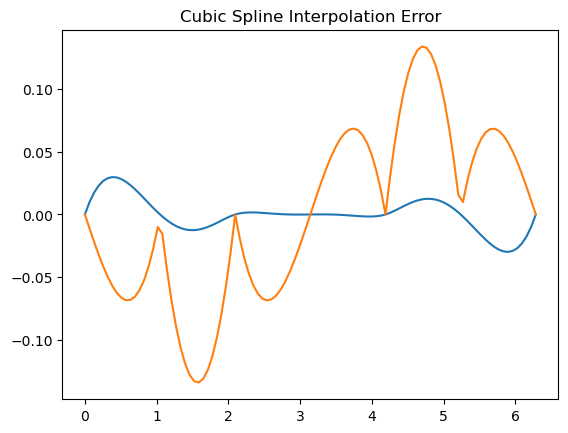

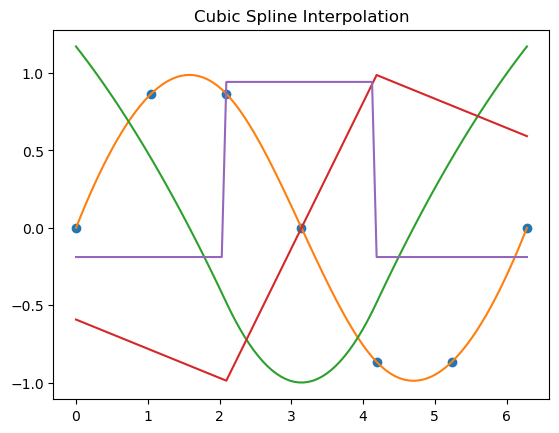

In [26]:
plt.plot(xnew,ynew_cubic-f(xnew))
plt.plot(xnew,ynew-f(xnew))
plt.title('Cubic Spline Interpolation Error')
#plt.plot(xnew,ynew-f(xnew))
plt.show()

plt.plot(x, f(x),'o')
#plt.plot(xnew, ynew)
plt.plot(xnew, ynew_cubic)
plt.plot(xnew, interp_f_CubicSpline(xnew,1))
plt.plot(xnew, interp_f_CubicSpline(xnew,2))
plt.plot(xnew, interp_f_CubicSpline(xnew,3))

plt.title('Cubic Spline Interpolation')
#plt.plot(xnew, f(xnew))
plt.show()


<h3>
    
If we wanted, we could do a higher (or lower) order spline as well:

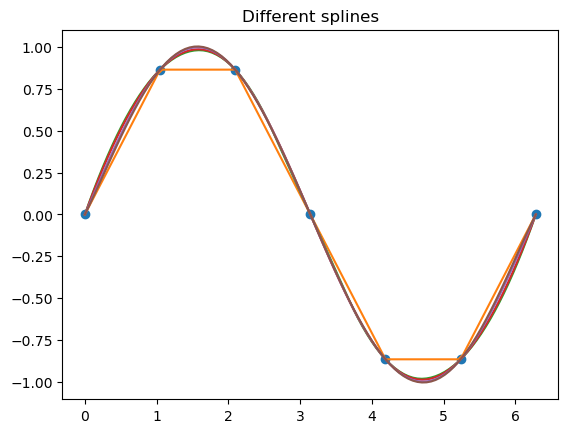

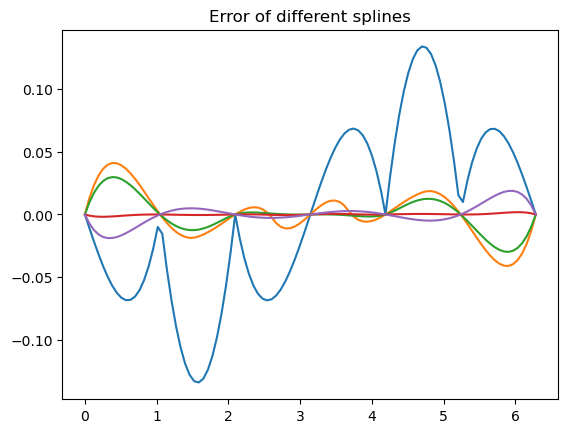

In [34]:

# Use InterpolateUnivariateSpline to calculate 1-st order (linear) through 5-th order splines.  k=3 is a Cubic spline.

interp_f_O1 = scipy_interpol.InterpolatedUnivariateSpline(x,y,k=1)
interp_f_O2 = scipy_interpol.InterpolatedUnivariateSpline(x,y,k=2)
interp_f_O3 = scipy_interpol.InterpolatedUnivariateSpline(x,y,k=3)
interp_f_O4 = scipy_interpol.InterpolatedUnivariateSpline(x,y,k=4)
interp_f_O5 = scipy_interpol.InterpolatedUnivariateSpline(x,y,k=5)

# Plots the splines

plt.plot(x, f(x),'o')
plt.plot(xnew, interp_f_O1(xnew))
plt.plot(xnew, interp_f_O2(xnew))
plt.plot(xnew, interp_f_O3(xnew))
plt.plot(xnew, interp_f_O4(xnew))
plt.plot(xnew, interp_f_O5(xnew))
plt.title('Different splines')
plt.show()


# Plot the errors

plt.plot(xnew, interp_f_O1(xnew)-f(xnew))
plt.plot(xnew, interp_f_O2(xnew)-f(xnew))
plt.plot(xnew, interp_f_O3(xnew)-f(xnew))
plt.plot(xnew, interp_f_O4(xnew)-f(xnew))
plt.plot(xnew, interp_f_O5(xnew)-f(xnew))
plt.title('Error of different splines')
plt.show()



<br>
<br>
<br>

# Gaussian Process Regression

<h3> Instead of using a spline or other interpolation, we are going to use a machine learning technique called Gaussian Process Regression.  (Sometimes also called Kriging.)
    
<br>
    
To do this, we will use the sklearn package, but you can do the same thing, with different syntax, using george or TensorFlow.
    
<br>
    
GPR has the advantage of giving in some sense the best possible interpolation, and giving you error bars on each interpolated point.
    
<br>
    
It can also be used for data with known errors, taking those into account when interpolating.
 
<br>
    
Details on GPR can be found here:  https://scikit-learn.org/stable/modules/gaussian_process.html
    

    


In [36]:
# Set up the GPR:


print(x)

# Get the 'X' values - time and frequency

#X = np.linspace(0,2*np.pi,7)
#
#y = f(x)


# Scale the x values over a good range.  Not so important for this example, but important when using multiple dimensions

#scaler = preprocessing.MinMaxScaler()
#scaler = preprocessing.StandardScaler()
#X_scaled = scaler.fit_transform(X)
X_scaled = x.reshape(-1,1)


# Choose a kernel

#kernel = Matern(nu=1.5) 
kernel = RationalQuadratic()
#kernel = RBF()
#kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))
#kernel = ConstantKernel()
#kernel = ExpSineSquared()

# Create the gpr procedure to be called for interpolation:

gpr = GaussianProcessRegressor(kernel=kernel, random_state=0, n_restarts_optimizer=9) #,alpha=0.01**2.)
gpr.fit(X_scaled,y)
#gpr.score(X_scaled,y)

print('Done making GPR')


print(gpr.kernel_)


[0.         1.04719755 2.0943951  3.14159265 4.1887902  5.23598776
 6.28318531]
Done making GPR
RationalQuadratic(alpha=1e+05, length_scale=2.08)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


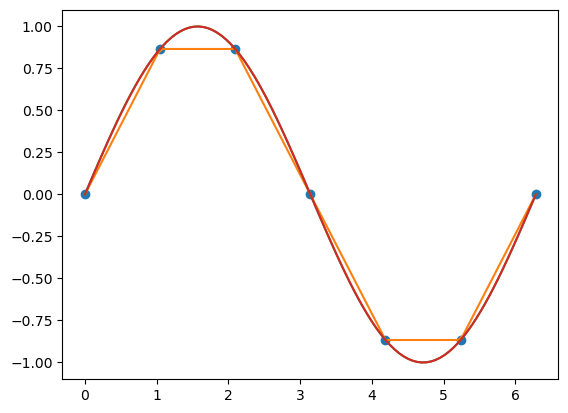

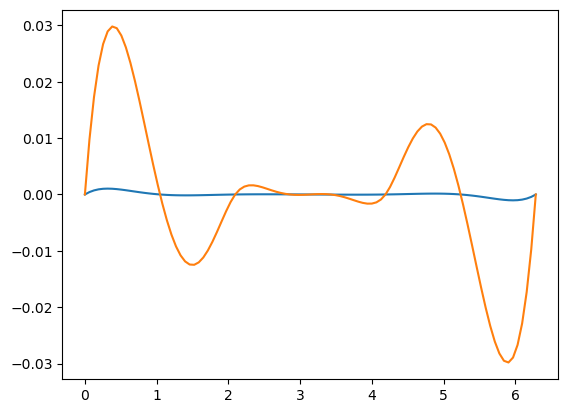

In [37]:
# Use GPR to interpolate data:

xnew = np.linspace(0,2*np.pi,100)
Xnew_scaled = xnew.reshape(-1,1)

#ynew = linear_interp(x,y,xnew)

y_fit_gpr = gpr.predict(Xnew_scaled, return_std=True)

ynew_gpr = np.asarray(y_fit_gpr[0])

sigma_gpr = np.asarray(y_fit_gpr[1])


# Plot the function and GPR fit:

plt.plot(x, f(x),'o')
plt.plot(xnew, ynew)
plt.plot(xnew, ynew_gpr)
plt.plot(xnew, f(xnew))
plt.show()


# And let's plot the difference between real and interpolated values:

plt.plot(xnew,ynew_gpr-f(xnew))
plt.plot(xnew,ynew_cubic-f(xnew))
#plt.plot(xnew,ynew-f(xnew))
plt.show()




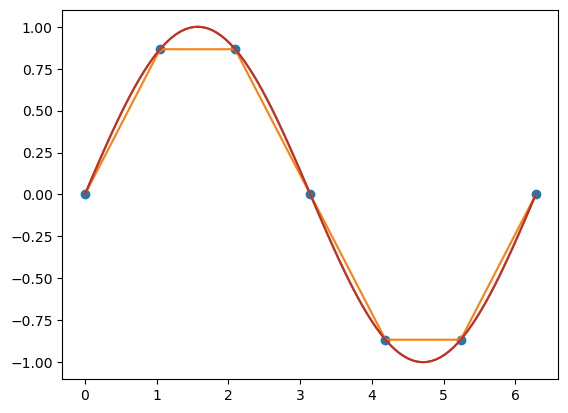

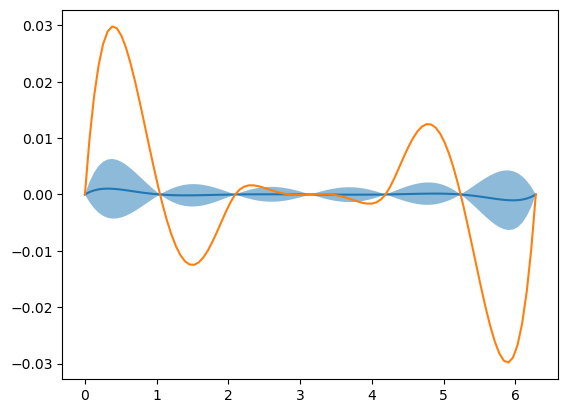

In [38]:


# Plot the function and GPR fit, with error bars:

plt.plot(x, f(x),'o')
plt.plot(xnew, ynew)
plt.plot(xnew, ynew_gpr)
plt.fill_between(xnew,ynew_gpr-sigma_gpr,ynew_gpr+sigma_gpr,alpha=0.5)
plt.plot(xnew, f(xnew))
plt.show()



plt.plot(xnew,ynew_gpr-f(xnew))
plt.plot(xnew,ynew_cubic-f(xnew))
plt.fill_between(xnew,ynew_gpr-f(xnew)-sigma_gpr,ynew_gpr-f(xnew)+sigma_gpr,alpha=0.5)
#plt.plot(xnew,ynew-f(xnew))
plt.show()


<h3>

Let's compare our GPR interpolation to higher order splines:



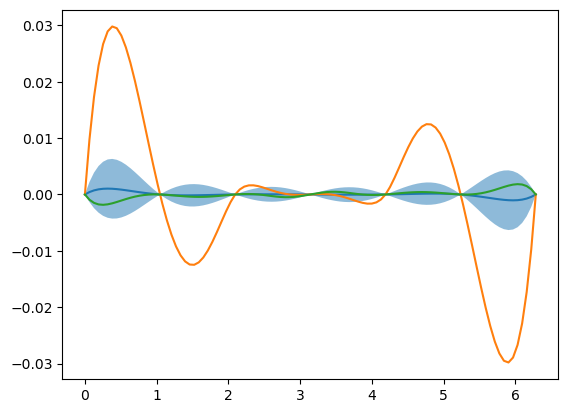

In [48]:

plt.plot(xnew,ynew_gpr-f(xnew))
plt.plot(xnew,ynew_cubic-f(xnew))
plt.fill_between(xnew,ynew_gpr-f(xnew)-sigma_gpr,ynew_gpr-f(xnew)+sigma_gpr,alpha=0.5)
plt.plot(xnew, interp_f_O4(xnew)-f(xnew))

#plt.plot(xnew,ynew-f(xnew))
plt.show()

# The error is even smaller than even a 4th or 5th order spline.
